# Project Template and Guidance

This Notebook is intended to provide some guidance for getting started with creating your first complete project workflow.

## Using Google Drive

Start by saving this Notebook to your Google Drive account. Then go to your Google Drive, click on the Colab Notebooks folder to find
You'll have to log into Google Drive this way if you want to load your dataset or save save your work as a new dataset.

In [ ]:
# Mount your Google Drive. It will prompt you to log into your Google account.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Change the working directory to your project folder.
import os
drive_path = '/content/drive/MyDrive/'
project_folder = 'Econ_0150_Project '
os.chdir(os.path.join(drive_path, project_folder))

## Step 0 | Imports and Setup

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf

In [ ]:
# Open a dataset from your project folder in Google Drive
ticket_data = pd.read_csv('ticket_data_99-24 (1).csv')
ticket_data.head()

,observation_date,Average_Ticket_Price_Index
0,1/1/1999,107.350
1,1/1/2000,114.275
2,1/1/2001,118.517
3,1/1/2002,122.283
4,1/1/2003,128.583


In [ ]:
income_data = pd.read_csv('median_household_income_99-24.csv')
income_data.head()

,observation_date,Median_Household_Income
0,1/1/1999,71980
1,1/1/2000,71790
2,1/1/2001,70610
3,1/1/2002,70040
4,1/1/2003,70080


## Step 1 | Data Preparation

Turn your data into something you can explore through data operations.

In [ ]:
# Data operations here
data = pd.merge(ticket_data, income_data, on = 'observation_date')
data.head()

,observation_date,Average_Ticket_Price_Index,Median_Household_Income
0,1/1/1999,107.350,71980
1,1/1/2000,114.275,71790
2,1/1/2001,118.517,70610
3,1/1/2002,122.283,70040
4,1/1/2003,128.583,70080


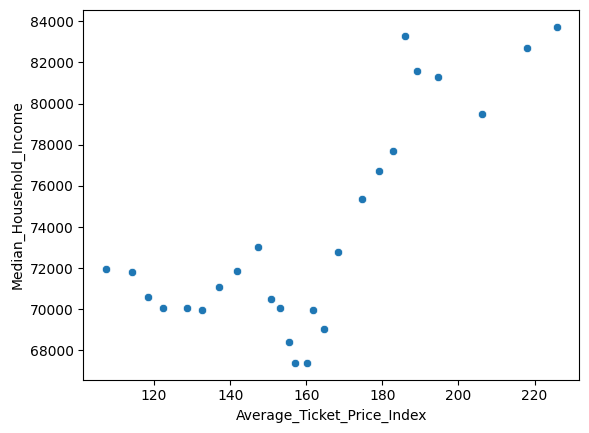

In [ ]:
sns.scatterplot(data=data, x = "Average_Ticket_Price_Index", y = "Median_Household_Income")
plt.show()

In [ ]:
# Save your dataset after you've worked on it
data.to_csv('cleaned_data.csv')

## Step 2 | Exploratory Data Analysis

Summarize the main variables and relationships of interest.

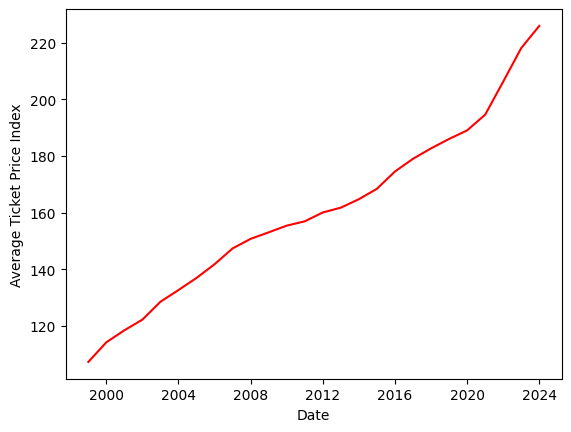

In [ ]:
# Exploratory Data Analysis here
data['observation_date'] = pd.to_datetime(data['observation_date'])
data['observation_date'].dt.year
sns.lineplot(data=data, x = "observation_date", y = "Average_Ticket_Price_Index", color = "red")
plt.ylabel("Average Ticket Price Index")
plt.xlabel("Date")
plt.show()

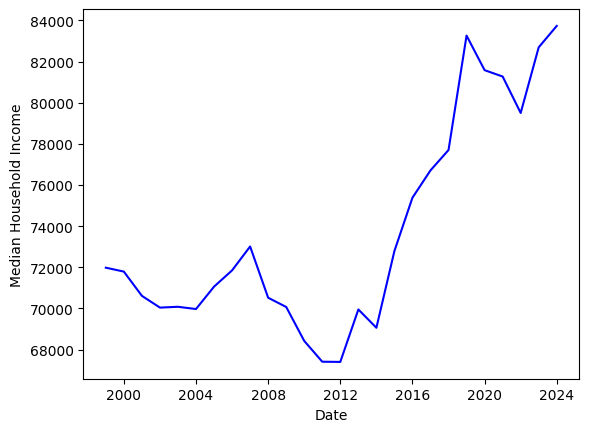

In [ ]:
sns.lineplot(data=data, x = "observation_date", y = "Median_Household_Income", color = "blue")
plt.ylabel("Median Household Income")
plt.xlabel("Date")
plt.show()

## Step 3 (Part 3 - 5)

Develop your statistical model.

1. Write down you null hypothesis
2. Write down your statistical model
3. Run your statistical model
4. Visualize your statistical model (if appropriate)

In [68]:
# Build and run your model here
data_equation = 'Median_Household_Income ~ Average_Ticket_Price_Index'

In [69]:
model = smf.ols(' Median_Household_Income ~ Average_Ticket_Price_Index', data=data).fit()
print(model.summary().tables[1])

                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     5.3e+04   3536.775     14.987      0.000    4.57e+04    6.03e+04
Average_Ticket_Price_Index   129.2106     21.622      5.976      0.000      84.585     173.836


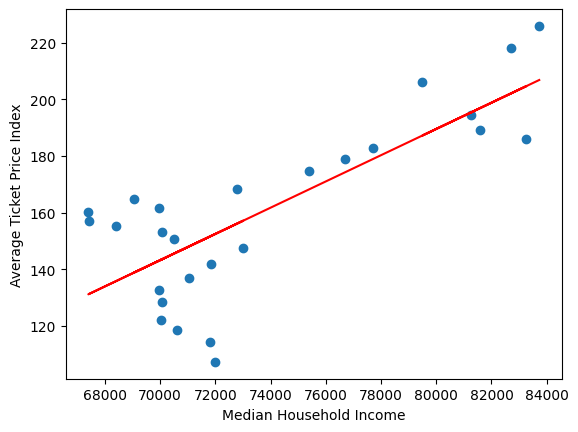

In [ ]:
plt.scatter(data['Median_Household_Income'], data['Average_Ticket_Price_Index'])
plt.plot(data['Median_Household_Income'], model.predict(), color='red')
plt.xlabel('Median Household Income')
plt.ylabel('Average Ticket Price Index')
plt.show()